In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
Residuals=np.load('/home/giacomo/Documents/Synthetic_dataset/E_N_TS_residuals.npy')
ResidualsT=np.load('/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/Residuals_tensors/E_N_Residuals_3years.npy')
ResidualsT=np.vstack(np.transpose(ResidualsT,[2,0,1]))

## Generate random numbers

from numpy.random import randn
Std=ResidualsT.std()
Mean=ResidualsT.mean() 
n=ResidualsT.shape[1]
random_input = Std*randn(ResidualsT.shape[0]* n) + Mean
random_input=np.reshape(random_input,(np.array(ResidualsT).shape[0],np.array(ResidualsT).shape[1]))
#Residuals=np.reshape(random_input,(ResidualsT.shape[0],ResidualsT.shape[1]))

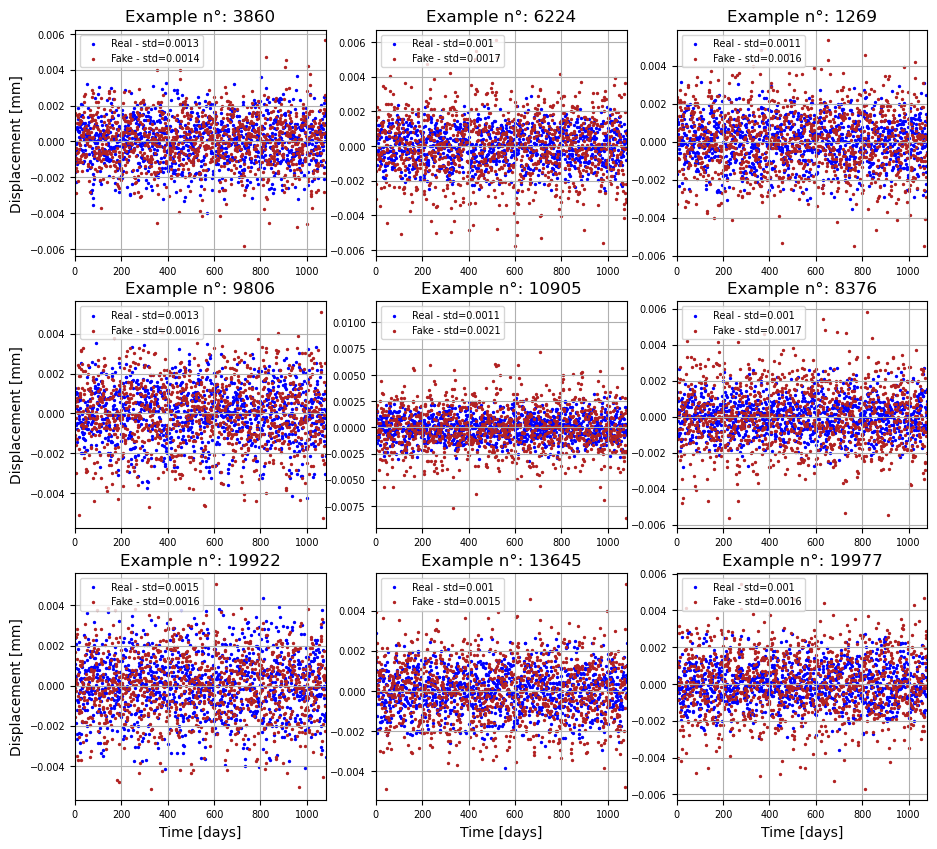

In [2]:

fig,axes=plt.subplots(3,3,figsize=(11,10))
samples=random.sample(range(Residuals.shape[0]), 9)
example=Residuals[samples,:]
samplesT=random.sample(range(ResidualsT.shape[0]), 9)
exampleT=ResidualsT[samplesT,:]
k=0
for i in range(3):
    for j in range(3):
        axes[i,j].scatter(range(exampleT[k].shape[0]),exampleT[k],s=2,color='blue',label='Real'+' - std='+str(round(np.nanstd(exampleT[k]),4)))
        axes[i,j].scatter(range(example[k].shape[0]),example[k],s=2,color='firebrick',label='Fake'+' - std='+str(round(np.nanstd(example[k]),4)))
        axes[i,j].set_xlim([0,len(example[k])])
        axes[i,j].grid(True)
        axes[i,j].set_title('Example n°: '+str(samples[k]))
        axes[i,j].tick_params(axis='both', which='major', labelsize=7)
        if i==2:
            axes[i,j].set_xlabel('Time [days]')
        if j==0:
            axes[i,j].set_ylabel('Displacement [mm]')
        axes[i,j].legend(loc='upper left',fontsize=7)
            
        k=k+1
plt.show()

<IPython.core.display.Javascript object>


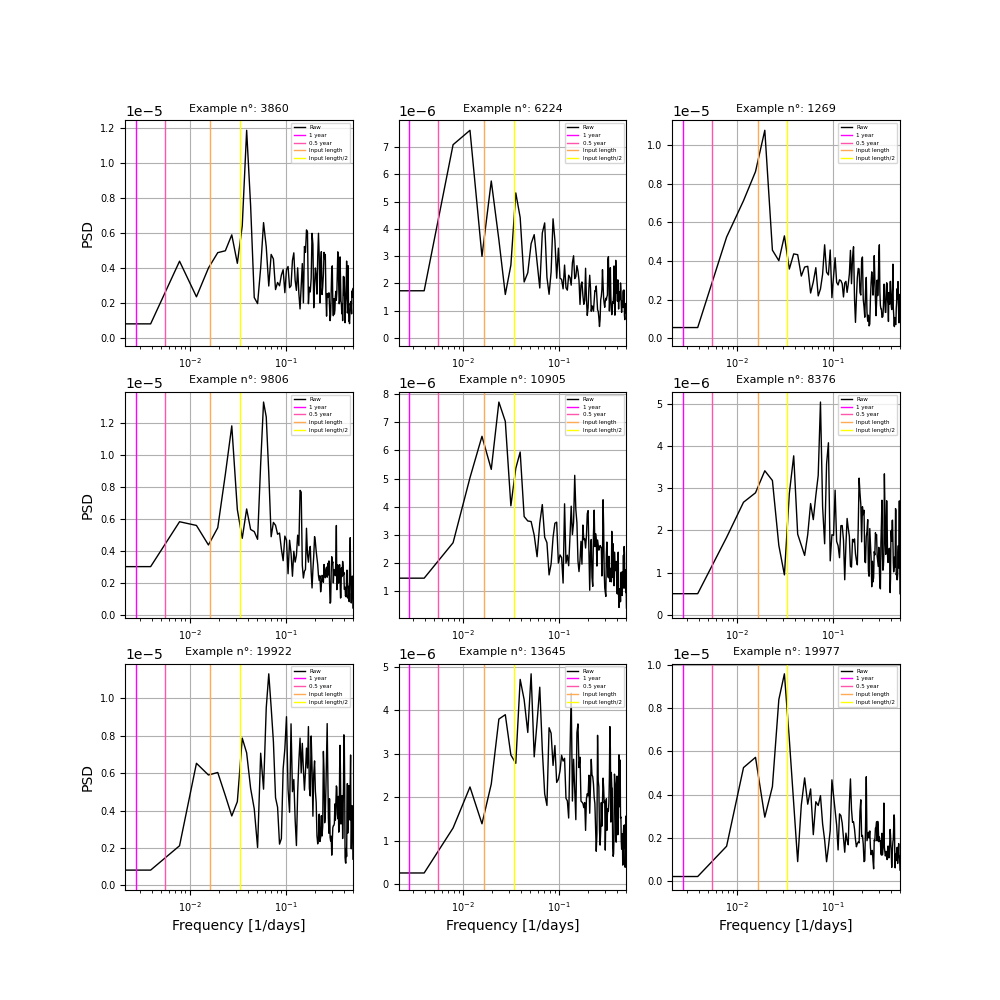

/tmp/ipykernel_2012965/442141148.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i,j].set_xlim(min(f),max(f))


(1081,)
(1081,)
(1081,)
(1081,)
(1081,)
(1081,)
(1081,)
(1081,)
(1081,)


In [5]:
import scipy
import matplotlib.pylab as pl
%matplotlib nbagg
fig,axes=plt.subplots(3,3,figsize=(10,10))
k=0
colors=pl.cm.spring(np.linspace(0,1,4))
for i in range(3):
    for j in range(3):
        (f, S)= scipy.signal.welch(exampleT[k], fs=1,nperseg=256) #exampleT
        axes[i,j].semilogx(f,S,label='Raw',linewidth=1,color='k')
        axes[i,j].axvline(x=1/365,color=colors[0],linewidth=1,label='1 year')
        axes[i,j].axvline(x=1/(365/2),color=colors[1],linewidth=1,label='0.5 year')
        axes[i,j].axvline(x=1/61,color=colors[2],linewidth=1,label='Input length')
        axes[i,j].axvline(x=1/30,color=colors[3],linewidth=1,label='Input length/2')
        axes[i,j].grid(True)
        axes[i,j].set_title('Example n°: '+str(samples[k]),fontsize=8)
        axes[i,j].tick_params(axis='both', which='major', labelsize=7)
        #ax1= axes[i,j].twinx()
        #ax1.scatter(np.linspace(min(f),max(f),len(exampleT[k])),exampleT[k],s=0.1,color='blue',label='Real'+' - std='+str(round(np.nanstd(exampleT[k]),4)))
        #ax1.set_yticks([])
        if i==2:
            axes[i,j].set_xlabel('Frequency [1/days]')
        if j==0:
            axes[i,j].set_ylabel('PSD')
        axes[i,j].legend(loc='upper right',fontsize=4)
        axes[i,j].set_xlim(min(f),max(f))
        print(example[k].shape) 
        k=k+1
plt.show()
plt.savefig('/home/giacomo/Documents/Synthetic_dataset/Figures/GAN_real.pdf')

<IPython.core.display.Javascript object>


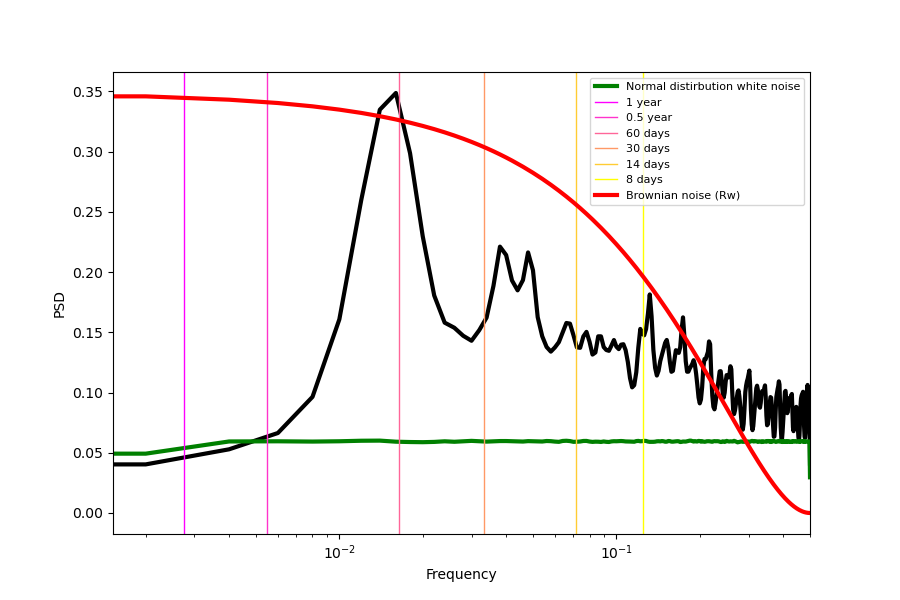

/tmp/ipykernel_2012965/1871466834.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_xlim(min(f),max(f))


In [8]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
ST=0
STR=0
colors=pl.cm.spring(np.linspace(0,1,6))
#ResidualsT are reals
for i in range(Residuals.shape[0]):
    exampleT=Residuals[i,:]
    (f, S)= scipy.signal.welch(exampleT, fs=1,nperseg=500)
    ST=ST+S
    if i < ResidualsT.shape[0]:
        R=random_input[i,:]
        (f, SR)= scipy.signal.welch(R, fs=1,nperseg=500)
        STR=STR+SR
    

axes.semilogx(f,ST,linewidth=3,color='k')
axes.semilogx(f,STR,linewidth=3,color='g',label='Normal distirbution white noise')
axes.axvline(x=1/365,color=colors[0],linewidth=1,label='1 year')
axes.axvline(x=1/(365/2),color=colors[1],linewidth=1,label='0.5 year')
axes.axvline(x=1/61,color=colors[2],linewidth=1,label='60 days')
axes.axvline(x=1/30,color=colors[3],linewidth=1,label='30 days')
axes.axvline(x=1/14,color=colors[4],linewidth=1,label='14 days')
axes.axvline(x=1/8,color=colors[5],linewidth=1,label='8 days')
axes.set_xlabel('Frequency')
axes.set_ylabel('PSD')
reversed_arr = np.max(ST)*4*(f**2)[::-1]
plt.plot(f,reversed_arr,color='r',linewidth=3,label='Brownian noise (Rw)')
axes.set_xlim(min(f),max(f))
axes.legend(loc='upper right',fontsize=8)

plt.savefig('/home/giacomo/Documents/Synthetic_dataset/Figures/Fake_PSD_E_N.pdf')

In [13]:
random_input.shape

(17673300,)

<IPython.core.display.Javascript object>


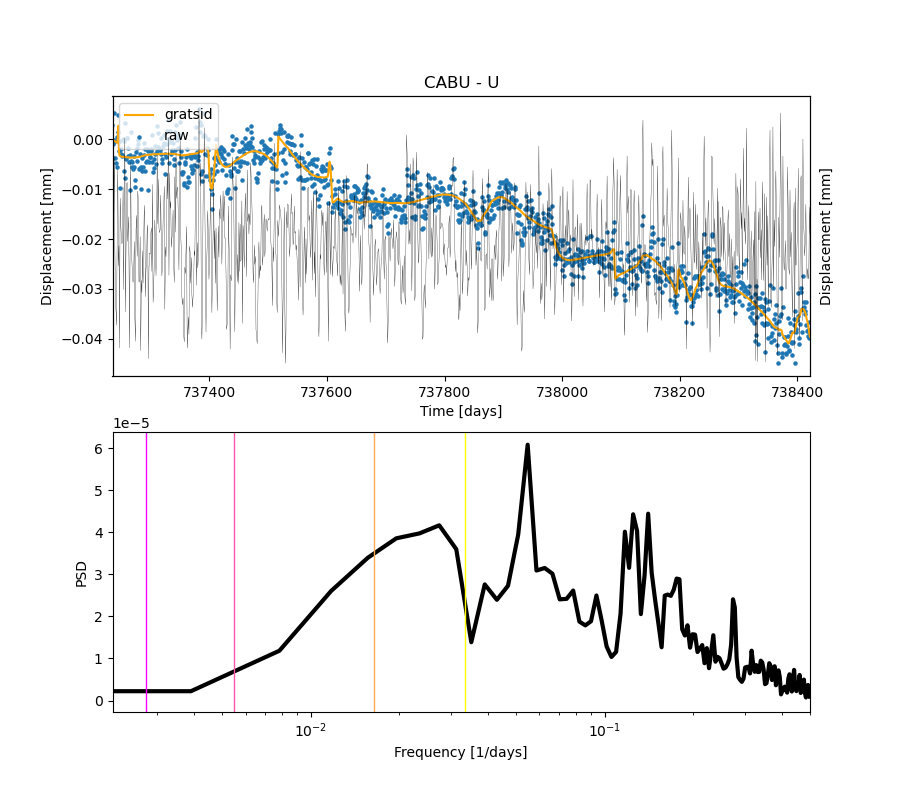

/tmp/ipykernel_2820343/3236659323.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set_xlim(min(f),max(f))


(0.0021117572414630164, 0.5)

In [201]:
comp='U'
station='CABU'
cd_data='/home/giacomo/Documents/Denoiser_GPS/Wordwide_dataset/t_disps_resids/'

t_old=np.loadtxt(cd_data+comp+'/'+station+'.txt')[:,0]
d=np.loadtxt(cd_data+comp+'/'+station+'.txt')[:,1]
r=np.loadtxt(cd_data+comp+'/'+station+'.txt')[:,2]

fig,axes=plt.subplots(2,1,figsize=(9,8))

t = np.linspace(t_old[0], t_old[-1], int(t_old[-1]-t_old[0]))
g_interp = np.interp(t, t_old, d-r)
d = np.interp(t, t_old, d)
r=d-g_interp

axes[0].plot(t,d-r,color='orange',label='gratsid')
axes[0].scatter(t,d,s=5,label='raw')
axes[0].set_xlim(t[0],t[-1])
ax1=axes[0].twinx()
ax1.plot(t,r,linewidth=0.2,color='k',label='Noise')
ax1.set_yticks([])
ax1.set_ylabel('Displacement [mm]')
axes[0].set_xlabel('Time [days]')
axes[0].set_ylabel('Displacement [mm]')
axes[0].legend(loc='upper left')
axes[0].set_title(station+' - '+comp)

(f, S)= scipy.signal.welch(r, fs=1,nperseg=256)
axes[1].semilogx(f,S,label='Raw',linewidth=3,color='k')
axes[1].axvline(x=1/365,color=colors[0],linewidth=1,label='1 year')
axes[1].axvline(x=1/(365/2),color=colors[1],linewidth=1,label='0.5 year')
axes[1].axvline(x=1/61,color=colors[2],linewidth=1,label='Input length')
axes[1].axvline(x=1/30,color=colors[3],linewidth=1,label='Input length/2')
axes[1].set_xlabel('Frequency [1/days]')
axes[1].set_ylabel('PSD')
axes[1].set_xlim(min(f),max(f))

### SYNTHETICS